In [20]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

#warnings.filterwarnings(action='once')
import pandas as pd
from pandas import MultiIndex, Int16Dtype

import numpy as np
import math

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, f1_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, PredefinedSplit
# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import plot_importance


In [21]:
#!pip3 install xgboost --upgrade

In [22]:
df_train = pd.read_csv('../data/train_encoded_1.csv')
df_test = pd.read_csv('../data/test_encoded_1.csv')
df_test = df_test.reindex(columns=df_train.columns.intersection(df_test.columns))

In [23]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(df_train, test_size=0.2)

In [24]:
X_final = df_train.drop(['price', 'price_per_sqft'], axis=1)
y_final = train['price_per_sqft']
X_train = train.drop(['price', 'price_per_sqft'], axis=1)
y_train = train['price_per_sqft']

X_valid = valid.drop(['price', 'price_per_sqft'], axis=1)
y_valid = valid['price_per_sqft']

df_test_size_sqft = df_test['size_sqft'].copy()
df_test.columns.difference(X_train.columns)


Index(['size_sqft'], dtype='object')

In [25]:
xgb_model = xgb.XGBRegressor(eval_metric=["error"], verbose_eval=50, seed =42)
xgb_model.fit(X_train, y_train)

yt_pred = xgb_model.predict(X_train)
yv_pred = xgb_model.predict(X_valid)

print('Training RMSE: {:.3f}'.format(mean_squared_error(yt_pred, y_train, squared=False)))
print('Test RMSE: {:.3f}'.format(mean_squared_error(yv_pred, y_valid, squared=False)))



[11:04:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "verbose_eval" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training RMSE: 191.579
Test RMSE: 290.137


<AxesSubplot: title={'center': 'Feature importance in XGBoost Regressor'}, xlabel='F score', ylabel='Features'>

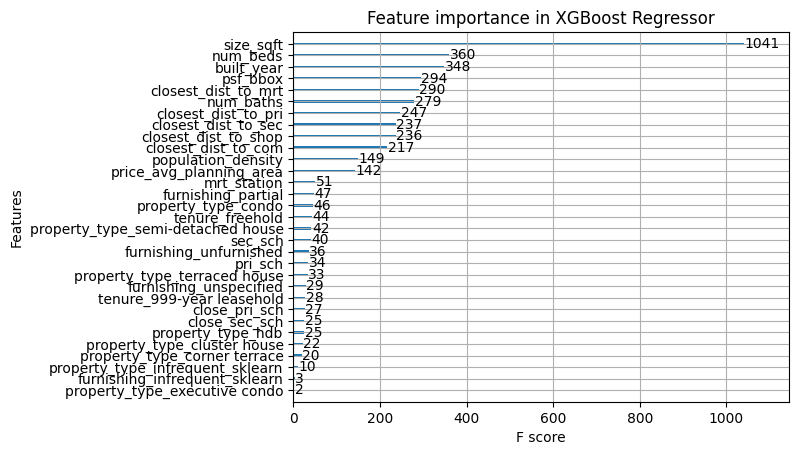

In [26]:
plot_importance(model, title = 'Feature importance in XGBoost Regressor')


<AxesSubplot: title={'center': 'Top 10 features in XGBoost Regressor'}, xlabel='F score', ylabel='Features'>

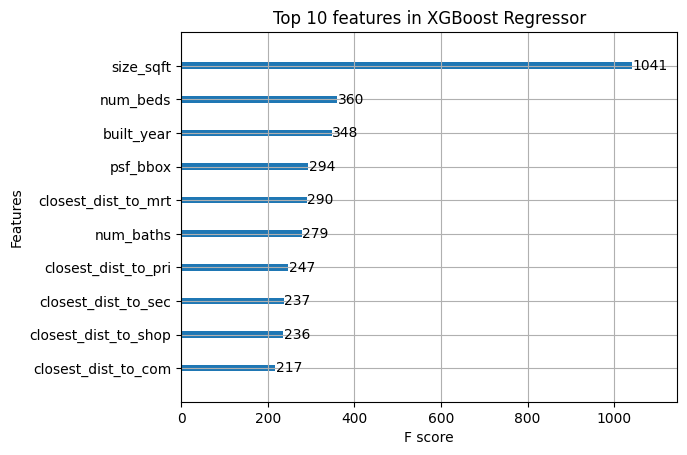

In [27]:
# plot feature importance
plot_importance(model, max_num_features = 10, title = 'Top 10 features in XGBoost Regressor')


<AxesSubplot: title={'center': 'Top 10 features in XGBoost Regressor, Importance Type = Gain'}, xlabel='F score', ylabel='Features'>

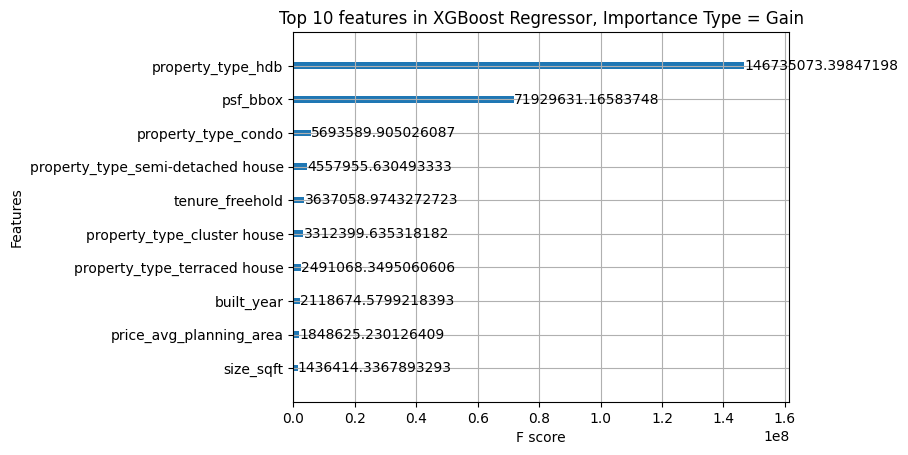

In [31]:
plot_importance(model, max_num_features = 10, importance_type= 'gain', title = 'Top 10 features in XGBoost Regressor, Importance Type = Gain')


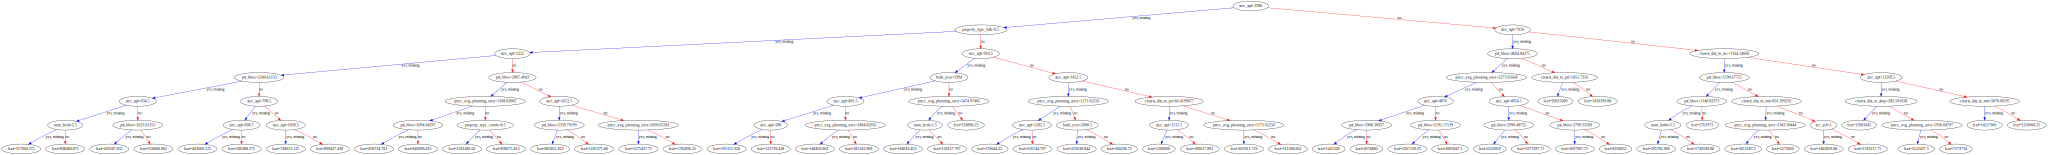

In [47]:
xgb.to_graphviz(xgb_model)

In [ ]:
yTest = xgb_model.predict(df_test)

yTest = yTest * df_test_size_sqft
yTest = pd.DataFrame(yTest.values, columns=['Predicted'], index=df_test.index)

yTest.to_csv('../predictions/xgboost_grid_search_plain.csv')

In [ ]:
warnings.filterwarnings('ignore')

xgb_model = xgb.XGBRegressor(verbose_eval=50, seed =42)

parameters = {'objective':['reg:squarederror'],
              'eta': [0.03], #so called `eta` value
              'gamma':[0],
              'max_depth': [6],
              'min_child_weight':[1],
              'max_delta_step':[0],
              'subsample': [1],
              'sampling_method':['uniform'],
              'colsample_by*':[1],
              'n_estimators': [2500, 3000],
              'reg_alpha':[0],
              'reg_lambda': [1],
              'tree_method':['auto'],
              'max_leaves':[0],
              'num_parallel_tree':[1],
              'booster': ['gbtree'], 
              'eval_metric': ['rmse'], 
              'verbose_eval': [50],
                'seed' :[42]}

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=KFold(n_splits=2, shuffle=True, random_state=42), 
                   scoring='neg_root_mean_squared_error',
                   verbose=0, refit=True)

clf.fit(X_train, y_train)

yt_pred = clf.predict(X_train)
yv_pred = clf.predict(X_valid)

print('Default Training RMSE: {:.3f}'.format(mean_squared_error(yt_pred, y_train, squared=False)))
print('Default Test RMSE: {:.3f}'.format(mean_squared_error(yv_pred, y_valid, squared=False)))


In [ ]:
#Best Parameters Found
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_model = xgb.XGBRegressor(verbose_eval=50, seed =42)

parameters = {'objective':['reg:squarederror'],
              'eta': [0.03], #done
              'gamma':[0.1], #done
              'max_depth': [6], #done
              'min_child_weight':[1], #done
              'max_delta_step':[0], #done
              'subsample': [1], #done
              'sampling_method':['uniform'], #done
              'colsample_by*':[1], #done
              'n_estimators': [2000], #done
              'reg_alpha':[0], #done
              'reg_lambda': [1], #done
              'tree_method':['auto'], #done
              'max_leaves':[0], #done
              'num_parallel_tree':[1], #done
              'booster': ['gbtree'], #done
              'eval_metric': ['rmse'], #done
              'verbose_eval': [50], #not required
                'seed' :[42]} #not required

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=KFold(n_splits=2, shuffle=True, random_state=42), 
                   scoring='neg_root_mean_squared_error',
                   verbose=0, refit=True)

clf.fit(X_train, y_train)

yt_pred = clf.predict(X_train)
yv_pred = clf.predict(X_valid)

print('Training RMSE: {:.3f}'.format(mean_squared_error(yt_pred, y_train, squared=False)))
print('Test RMSE: {:.3f}'.format(mean_squared_error(yv_pred, y_valid, squared=False)))


In [ ]:
print(clf.best_params_)

print(clf.best_estimator_)

print(clf.best_score_)

print(clf.predict(df_test.copy()))


In [ ]:
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_model = xgb.XGBRegressor(verbose_eval=50, seed =42)

parameters = {'objective':['reg:squarederror'],
              'eta': [0.03], #done
              'gamma':[0.1], #done
              'max_depth': [6], #done
              'min_child_weight':[1], #done
              'max_delta_step':[0], #done
              'subsample': [1], #done
              'sampling_method':['uniform'], #done
              'colsample_by*':[1], #done
              'n_estimators': [2000], #done
              'reg_alpha':[0], #done
              'reg_lambda': [1], #done
              'tree_method':['auto'], #done
              'max_leaves':[0], #done
              'num_parallel_tree':[1], #done
              'booster': ['gbtree'], #done
              'eval_metric': ['rmse'], #done
              'verbose_eval': [50], #not required
                'seed' :[42]} #not required

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=KFold(n_splits=2, shuffle=True, random_state=42), 
                   scoring='neg_root_mean_squared_error',
                   verbose=0, refit=True)

clf.fit(X_final, y_final)

In [ ]:
yt_pred = clf.predict(X_train)
print('Training RMSE: {:.3f}'.format(mean_squared_error(yt_pred, y_train, squared=False)))


In [ ]:
yTest = clf.predict(df_test)

yTest = yTest * df_test_size_sqft
yTest = pd.DataFrame(yTest.values, columns=['Predicted'], index=df_test.index)

yTest.to_csv('../predictions/xgboost_grid_search_final_full_db.csv')